In [19]:
#debug options
# http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
#incleding modules
import pandas as pd
from os import path
import utils.shared as utils
import utils.analysis as analysis
import matplotlib.pyplot as plt

In [95]:
# Path variable initialize
root_dir = '../rawdata/sber/'
xlsx_file = path.join(root_dir,'tech_suply.xlsx')
# xlsx_file = path.join(root_dir,'toy.xlsx')

In [96]:
# Get dataset xlsx => df
rawdataset = pd.read_excel(xlsx_file)

In [97]:
# Drop useless columns df => df
l_column ="CHAT_ID"
r_column ="TYPE"
dataset = rawdataset.loc[:, l_column:r_column]

In [98]:
# Tokinaze useless columns df => df
column_name = 'TEXT'
patterns = utils.regex_patterns.std_tokinaze
tokinazed_dataset = utils.tokinaze_column(dataset, column_name,patterns)

100% (5 of 5) |###########################| Elapsed Time: 0:00:31 Time: 0:00:31


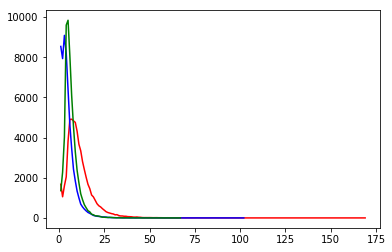

In [136]:
# Get replies distibution df => series
speaker = None # CORPORATE, MANAGER
replies_numbers_chats = analysis.get_replies_distibution(tokinazed_dataset, speaker)
replies_numbers = pd.Series(replies_numbers_chats.index)

speaker = 'CORPORATE'
cor_replies_numbers_chats = analysis.get_replies_distibution(tokinazed_dataset, speaker)
cor_replies_numbers = pd.Series(cor_replies_numbers_chats.index)

speaker = 'MANAGER'
man_replies_numbers_chats = analysis.get_replies_distibution(tokinazed_dataset, speaker)
man_replies_numbers = pd.Series(man_replies_numbers_chats.index)
plt.plot(replies_numbers, replies_numbers_chats, 'r',
         cor_replies_numbers, cor_replies_numbers_chats, 'b',
         man_replies_numbers, man_replies_numbers_chats, 'g'
        )

In [145]:
cor_replies_numbers_chats

1      8540
2      7935
3      9092
4      8207
5      6401
6      4640
7      3468
8      2429
9      1846
10     1339
11      998
12      690
13      549
14      440
15      351
16      275
17      229
18      179
19      125
20      103
21       84
22       74
23       67
24       48
25       46
26       44
27       21
28       27
29       15
30       17
31       11
32        8
33       19
34        9
35        4
36        5
37        6
38        5
39        4
40        5
41        5
42        1
43        3
44        4
46        4
47        3
48        5
49        3
50        3
51        2
54        2
57        1
59        1
67        1
75        1
102       1
Name: CHAT_ID, dtype: int64